## Descriptive Statistics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Read the cleaned data into a dataframe
X = pd.read_csv("../data/processed/X.csv")
X.columns = ['Lab-confirmed case', 'Female', 'Male',\
       '0 - 9 Years', '10 - 19 Years',\
       '20 - 29 Years', '30 - 39 Years',\
       '40 - 49 Years', '50 - 59 Years',\
       '60 - 69 Years', '70 - 79 Years',\
       '80+ Years',\
       'American Indn./AK Nat.',\
       'Asian',\
       'Black',\
       'Hispanic/Latino',\
       'Multiple/Other',\
       'Nat. HI/Other Pac. Isl.',\
       'White', 'Hosp_No',\
       'Hosp_Yes', 'ICU_No', 'ICU_Yes', 'Medcond_No',\
       'Medcond_Yes']
X_cat = pd.read_csv("../data/processed/X_Cat.csv")
y = pd.read_csv("../data/processed/Y.csv")

In [18]:
combineddf = pd.concat([X_cat,y], axis = 1)
combineddf = combineddf.drop('current_status', axis = 1)

## Distribution of Each Variable

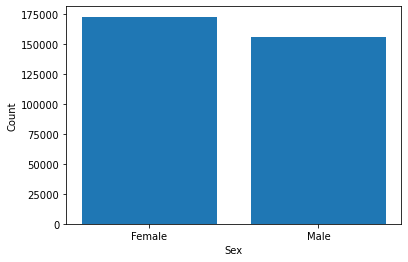

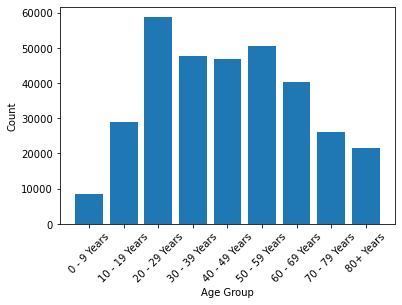

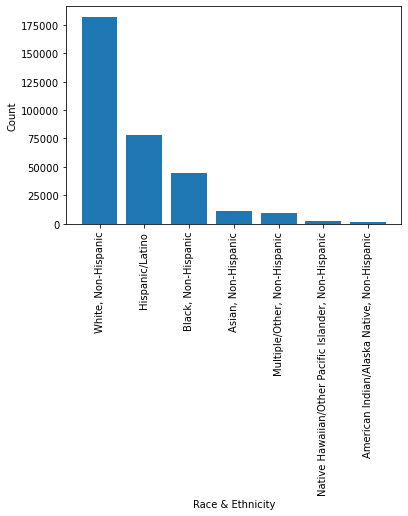

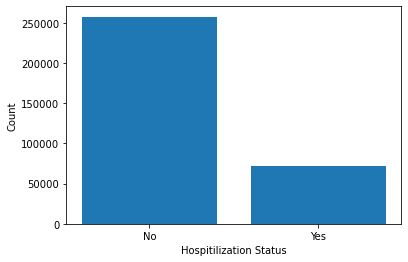

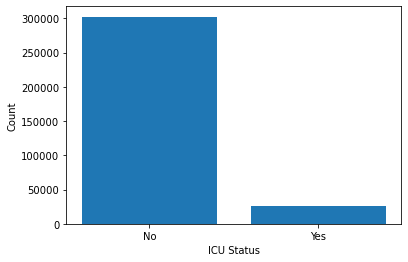

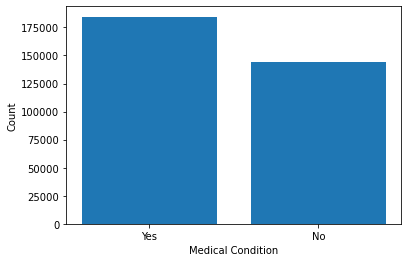

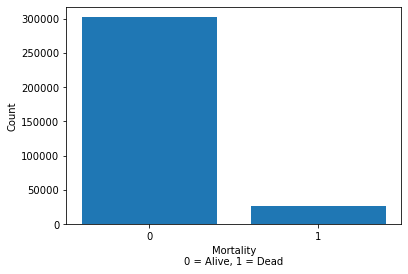

In [52]:
#Sex
plt.bar(combineddf['sex'].value_counts().index, combineddf['sex'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Age
plt.bar(combineddf['age_group'].value_counts().sort_index().index, combineddf['age_group'].value_counts().sort_index(),\
        ecolor='black', align='center')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Race & Ethnicity
plt.bar(combineddf['Race and ethnicity (combined)'].value_counts().index, combineddf['Race and ethnicity (combined)'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('Race & Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Hospitalized
plt.bar(combineddf['hosp_yn'].value_counts().index, combineddf['hosp_yn'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('Hospitilization Status')
plt.ylabel('Count')
plt.show()


#ICU Status
plt.bar(combineddf['icu_yn'].value_counts().index, combineddf['icu_yn'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('ICU Status')
plt.ylabel('Count')
plt.show()

#Medcond Status
plt.bar(combineddf['medcond_yn'].value_counts().index, combineddf['medcond_yn'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

#Mortality
plt.bar(combineddf['death_yn'].value_counts().index.astype(str), combineddf['death_yn'].value_counts(),\
        ecolor='black', align='center')
plt.xlabel('Mortality\n0 = Alive, 1 = Dead')
plt.ylabel('Count')
plt.show()




## Correlations of Each Dummy and Response

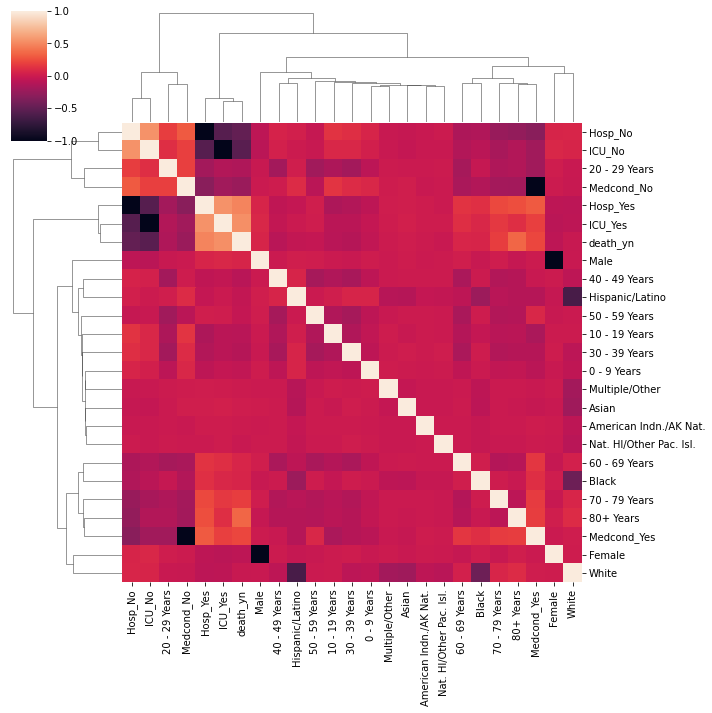

In [59]:
combineddf2 = pd.concat([X,y], axis = 1)
combineddf2 = combineddf2.drop('Lab-confirmed case', axis = 1)
cormat = combineddf2.corr(method='pearson')
heatmap=sns.clustermap(cormat, metric="euclidean", method="ward")

## Visualizing Correlations Between Each Feature and Response

In [99]:
X = X.drop('Lab-confirmed case', axis = 1)
corrdf = pd.DataFrame()
for f in X.columns:
    corrdf.loc[f,'Pearson Correlation'] = y.iloc[:,0].corr(X.loc[:,f])

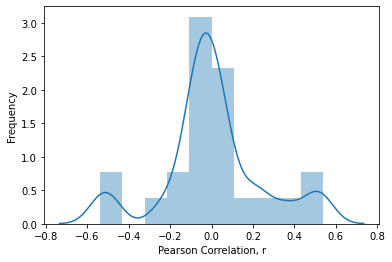

In [104]:
sns.distplot(corrdf)
plt.xlabel('Pearson Correlation, r')
plt.ylabel('Frequency')
plt.show()

In [108]:
corrdf = corrdf.sort_values('Pearson Correlation', ascending = False)
corrdf

,Pearson Correlation
ICU_Yes,0.539013
Hosp_Yes,0.487419
80+ Years,0.358022
Medcond_Yes,0.234374
70 - 79 Years,0.192844
60 - 69 Years,0.078057
Black,0.066856
Male,0.063419
Asian,0.023402
Multiple/Other,0.006552


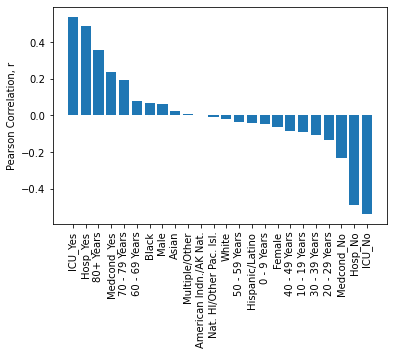

In [111]:
plt.bar(corrdf.index, corrdf.loc[:,'Pearson Correlation'], ecolor='black', align='center')
plt.ylabel('Pearson Correlation, r')
plt.xticks(rotation=90)
plt.show()